In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import string
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

## 1. Cleaning and preparing the dataset

In [2]:
df = pd.read_pickle('Data/ug_dataset.pkl')

In [3]:
#Turning the lyrics into a string, putting in lowercase to process stopwords
df['Lyrics']  = df['Lyrics'].apply(lambda x: ' '.join(map(str, x))).str.lower()

#Adding the stopword list 
stops = set(stopwords.words("english"))

#Removing the stop words
df['TokenizedLyrics']  =  df.Lyrics.str.split(' ').apply(lambda l: [w for w in l if w not in stops])

In [4]:
wrong_lyrics = (df.TokenizedLyrics.apply(len) < 40) | (df.Lyrics.str.contains(r"[\+\_\|]"))
print("NUMBER OF WRONG LYRICS =", wrong_lyrics.sum())
df[wrong_lyrics].Lyrics

NUMBER OF WRONG LYRICS = 487


17       wise men say, only fools rush in but i can't ...
66      with your feet in the air and your head on the...
68      way down in louisiana down to new orleans way ...
70      open your eyes, look up to the skies and see. ...
77      words are flowing out like endless rain into a...
81      well i'm a runnin' down the road try'n to loos...
86      i wish you would step back from that ledge my ...
89      load up on guns bring your friends it's fun to...
98      i’m pretty tired of dropping down to bddddd to...
108     hold on little girl. show me what he's done to...
114      you got a fast car. i want a ticket to anywhe...
137     i'm gonna fight 'em off, a seven nation army c...
139     forgive me, i'm trying to find my calling, i'm...
141     look into my eyes, you will see what you mean ...
145     when i find myself in times of trouble, mother...
179     lift your head, baby, don't be scared of the t...
182     central lead thing then you can add little thi...
184     save u

In [5]:
wrong_chords = df.Chords.apply(len) < 4
print("NUMBER OF WRONG CHORDS =", wrong_chords.sum())
df[wrong_chords].Chords

NUMBER OF WRONG CHORDS = 22


1391                []
1883      [G#, Cm, Fm]
2525                []
2637                []
2650                []
2677                []
2726                []
3687      [G#, Cm, Fm]
3711                []
3896          [G7, E7]
3966    [F#min, G, Em]
3982     [F#m, A, F#m]
4134           [Em, D]
4195               [D]
4254                []
4351                []
4370                []
4496                []
4628                []
4871         [E, A, B]
4992                []
5171                []
Name: Chords, dtype: object

In [6]:
wrong_entries = wrong_chords | wrong_lyrics

In [7]:
df[wrong_entries]

,Title,Artist,Genre,URL,Hits,Chords,Lyrics,TokenizedLyrics
17,Cant Help Falling In Love,Elvis Presley,Rock,https://tabs.ultimate-guitar.com/tab/elvis_pre...,7744681,"[C, G, Am, C, G, C, Em, Am, F, C, G, F, G, Am,...","wise men say, only fools rush in but i can't ...","[, wise, men, say,, fools, rush, can't, help, ..."
66,Where Is My Mind,Pixies,Rock,https://tabs.ultimate-guitar.com/tab/pixies/wh...,2733890,"[E, C#m, G#, A, E, C#m, G#, A, E, C#m, G#, A, ...",with your feet in the air and your head on the...,"[feet, air, head, ground, try, trick, spin, it..."
68,Johnny B Goode,Chuck Berry,Rock,https://tabs.ultimate-guitar.com/tab/chuck_ber...,2691329,"[Eb, Bb, F, Eb, Bb, F, Bb, Eb, Bb, F, Bb, Bb, ...",way down in louisiana down to new orleans way ...,"[way, louisiana, new, orleans, way, back, wood..."
70,Bohemian Rhapsody,Queen,Rock,https://tabs.ultimate-guitar.com/tab/queen/boh...,2586372,"[Gm7, C7, Gm7, C7, Gm7, C7, F7, Cm7, F7, Bb, C...","open your eyes, look up to the skies and see. ...","[open, eyes,, look, skies, see., i'm, poor, bo..."
77,Across The Universe,The Beatles,Rock,https://tabs.ultimate-guitar.com/tab/the_beatl...,2491595,"[D, Bm, F#m, Em7, A, A7, D, Bm, F#m, Em7, Gm, ...",words are flowing out like endless rain into a...,"[words, flowing, like, endless, rain, paper, c..."
81,Take It Easy,Eagles,Rock,https://tabs.ultimate-guitar.com/tab/eagles/ta...,2420253,"[Am7/G, D7sus4/G, G, Am7/G, D7sus4/G, G, D, C,...",well i'm a runnin' down the road try'n to loos...,"[well, i'm, runnin', road, try'n, loosen, load..."
86,Jumper,Third Eye Blind,Rock,https://tabs.ultimate-guitar.com/tab/third_eye...,2373924,"[Fmaj7, C, G, Am, D11, Fmaj7, C, G, Am, C, G, ...",i wish you would step back from that ledge my ...,"[wish, would, step, back, ledge, friend..., ....."
89,Smells Like Teen Spirit,Nirvana,Rock,https://tabs.ultimate-guitar.com/tab/nirvana/s...,2305857,"[E, A, G, C, E, A, G, C, E, A, G, C, E, A, G, ...",load up on guns bring your friends it's fun to...,"[load, guns, bring, friends, it's, fun, lose, ..."
98,Iris,Goo Goo Dolls,Rock,https://tabs.ultimate-guitar.com/tab/goo_goo_d...,2123152,"[E, D, G5, D, Dsus2, Asus4, Bm7, Bm9, G5, D, D...",i’m pretty tired of dropping down to bddddd to...,"[i’m, pretty, tired, dropping, bddddd, play, s..."
108,To Be With You,Mr. Big,Rock,https://tabs.ultimate-guitar.com/tab/mr_big/to...,1944633,"[C#m, E, Asus2, E, C#m, E, Asus2, E, Asus2, E,...",hold on little girl. show me what he's done to...,"[hold, little, girl., show, he's, done, you., ..."


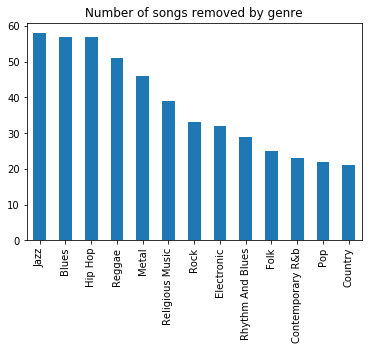

In [8]:
df[wrong_entries].Genre.value_counts().plot(kind="bar")
plt.title("Number of songs removed by genre")
plt.show()

Between 22 and 58 songs have been removed for each genre, which is acceptable in terms of balance considering they all started with 400 songs.

Upon inspection, one entry has some empty lists in its chord sequence and 2 songs have one wrongly parsed chord with the html tags still in it :

In [9]:
#chords with tags not removed
df[df.Chords.apply(lambda cl : any(('[' in c) or (']' in c) for c in cl))]

,Title,Artist,Genre,URL,Hits,Chords,Lyrics,TokenizedLyrics
1489,You And I,Wilco,Country,https://tabs.ultimate-guitar.com/tab/wilco/you...,211886,"[Am9, C, Am9, C, Am9, C, Am9, C, F, Em, Am9, F...",you and i we might be strangers however close ...,"[might, strangers, however, close, get, someti..."
2568,Zzyzx Rd,Stone Sour,Metal,https://tabs.ultimate-guitar.com/tab/stone_sou...,85976,"[B, G#min, E, F#, B, G#min, E, B, F#, B, G#min...",i don't know how else to put this. it's taken ...,"[don't, know, else, put, this., it's, taken, l..."


In [10]:
df.iloc[2568].Chords[24]

'[ch]G#min'

In [11]:
#song with empty array as chords
df.iloc[3999].Chords

['G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 'C',
 'Em',
 'C',
 'G',
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

We remove the empty lists and the wrong chords with the following commands :

In [12]:
df.Chords = df.Chords.apply(lambda l : list(filter(None, l)))
df.Chords = df.Chords.apply(lambda l : list(filter(lambda c : "[" not in c and "]" not in c, l)))

In [13]:
filtered_df = df[~wrong_entries].copy()
filtered_df

,Title,Artist,Genre,URL,Hits,Chords,Lyrics,TokenizedLyrics
0,Hallelujah,Jeff Buckley,Rock,https://tabs.ultimate-guitar.com/tab/jeff_buck...,23157554,"[C, Am, C, Am, C, Am, C, Am, F, G, C, G, C, F,...",i heard there was a secret chord that david pl...,"[heard, secret, chord, david, played, pleased,..."
1,Im Yours,Jason Mraz,Rock,https://tabs.ultimate-guitar.com/tab/jason_mra...,16413451,"[G, D, Em, C, G, D, Em, C, G, D, Em, C, G, D, ...","well you done done me and you bet i felt it, i...","[well, done, done, bet, felt, it,, tried, chil..."
2,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,12091872,"[Em7, G, Dsus4, A7sus4, Em7, G, Dsus4, A7sus4,...",today is gonna be the day that they're gonna t...,"[today, gonna, day, they're, gonna, throw, bac..."
3,Wish You Were Here,Pink Floyd,Rock,https://tabs.ultimate-guitar.com/tab/pink_floy...,10529033,"[Em7, G, Em7, G, Em7, A7sus4, Em7, A7sus4, G, ...","so, so you think you can tell, heaven from hel...","[so,, think, tell,, heaven, hell,, blue, skies..."
4,Hey Soul Sister,Train,Rock,https://tabs.ultimate-guitar.com/tab/train/hey...,10423751,"[C, G, Am, F, C, G, Am, F, C, G, Am, F, G, C, ...",your lipstick stains on the front lobe of my l...,"[lipstick, stains, front, lobe, left, side, br..."
5,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,9452644,"[F#m, A, Esus4, B, F#m, A, Esus4, B, F#m, A, E...",today is gonna be the day that they're gonna t...,"[today, gonna, day, they're, gonna, throw, bac..."
6,The Only Exception,Paramore,Rock,https://tabs.ultimate-guitar.com/tab/paramore/...,9420989,"[G, Dm, Cmaj7, G, Dm, Cmaj7, G, Dm, Cmaj7, G, ...",when i was younger i saw my daddy cry and curs...,"[younger, saw, daddy, cry, curse, wind, mama, ..."
7,Love Story,Taylor Swift,Rock,https://tabs.ultimate-guitar.com/tab/taylor_sw...,8964458,"[C, G, Am, F, C, F, Am, F, C, F, Am, G, F, G, ...",we were both young when i first saw you i clos...,"[young, first, saw, close, eyes, flashback, st..."
8,Iris,Goo Goo Dolls,Rock,https://tabs.ultimate-guitar.com/tab/goo_goo_d...,8841766,"[Bm, Bsus2, G, D, Em, G, Bm, A, G, D, Em, G, B...",and i'd give up forever to touch you 'cause i ...,"[i'd, give, forever, touch, 'cause, know, feel..."
9,Let It Be,The Beatles,Rock,https://tabs.ultimate-guitar.com/tab/the_beatl...,8786451,"[C, G, Am, Fmaj7, F6, C, G, F, C/E, Dm, C, C, ...","when i find myself in times of trouble, mother...","[find, times, trouble,, mother, mary, comes, s..."


## 2. Lexical complexity : TF-IDF analysis of lyrics

In [14]:
#Applying the Sklearn implementation of TF-IDF
tfidf_vec = TfidfVectorizer()
transformed = tfidf_vec.fit_transform(filtered_df.TokenizedLyrics.apply(lambda x: ' '.join(map(str, x))))
index_value={i[1]:i[0] for i in tfidf_vec.vocabulary_.items()}

#Getting the full index
fully_indexed = []
for row in transformed:
    fully_indexed.append({index_value[column]:value for (column,value) in zip(row.indices,row.data)})

#Putting the output in the DataFrame
filtered_df['tf_idf'] = fully_indexed

In [15]:
filtered_df.tf_idf

0       {'heard': 0.06606076697293795, 'secret': 0.088...
1       {'don': 0.06749892525209408, 'music': 0.053827...
2       {'heard': 0.04545112221889412, 'don': 0.103286...
3       {'cold': 0.17738530760119117, 're': 0.04458131...
4       {'don': 0.045072174119906036, 'you': 0.0604750...
5       {'heard': 0.03935016847613902, 'don': 0.089422...
6       {'you': 0.011730649469387785, 'like': 0.013389...
7       {'don': 0.08138220859348926, 'really': 0.03751...
8       {'don': 0.27428864541810055, 'you': 0.06133729...
9       {'music': 0.03589833848543034, 'broken': 0.033...
10      {'don': 0.1231782711593659, 'care': 0.04853342...
11      {'king': 0.12829646972850534, 'used': 0.106075...
12      {'don': 0.06344273887248081, 'music': 0.050592...
13      {'heard': 0.16498429026468342, 'don': 0.131223...
14      {'don': 0.03630649541227745, 'you': 0.16237946...
15      {'it': 0.0303916712612677, 're': 0.01061145576...
16      {'you': 0.017203704332945328, 'well': 0.015538...
18      {'don'

In [16]:
#Computing the average score of each song
filtered_df['average_score'] = filtered_df['tf_idf'].apply(lambda d: np.mean(list(d.values())))

In [17]:
filtered_df.sort_values('average_score', ascending=False).average_score

2176    0.258377
3397    0.247479
4890    0.231578
570     0.217333
4824    0.213592
4528    0.209964
90      0.208049
2164    0.207539
3500    0.204782
3228    0.201846
3293    0.200057
5173    0.198153
1688    0.196857
4978    0.192697
380     0.190837
4413    0.190431
298     0.190324
1556    0.190060
1774    0.189840
770     0.189626
1970    0.188200
4791    0.187870
5185    0.187830
228     0.186660
3477    0.186125
4911    0.184601
4821    0.183846
5040    0.183439
5137    0.182551
4655    0.182133
          ...   
2900    0.034062
2959    0.033534
3934    0.032791
3694    0.032360
4894    0.032092
3033    0.031663
4267    0.031262
508     0.030851
949     0.030851
3871    0.030322
3878    0.030070
691     0.029702
3923    0.029324
2395    0.027517
3721    0.027510
592     0.027506
1740    0.026987
3897    0.024843
3939    0.024803
1034    0.023554
2834    0.023554
3070    0.023307
3697    0.023307
3055    0.022955
3686    0.022955
2983    0.022430
221     0.017680
2812    0.0176

This score is our measure of complexity (by rarity) : the higher it is, the more complex the lyrics.

## 3. Harmonic complexity

In [18]:
chord_set_by_song = filtered_df['Chords'].apply(set)
all_chords = reduce(set.union, chord_set_by_song)
print("Total number of different chords found in our dataset :", len(all_chords), "chords.")

Total number of different chords found in our dataset : 970 chords.


In [19]:
#Helper method to show the set of chords in our dataset that contains a certain "component" string
def show_set_of_chords(component):
    return set([ c for c in all_chords if component in c ])

show_set_of_chords("sus")

{'A7(sus)',
 'A7sus',
 'A7sus4',
 'Absus',
 'Asus',
 'Asus2',
 'Asus2/A',
 'Asus2/E',
 'Asus2/F#',
 'Asus2/G',
 'Asus4',
 'Asus7',
 'B7sus',
 'B7sus2',
 'B7sus4',
 'B9sus4',
 'Bb6sus2',
 'Bb7sus4',
 'Bbsus',
 'Bbsus2',
 'Bbsus4',
 'Bbsus4/Eb',
 'Bsus',
 'Bsus/F#',
 'Bsus2',
 'Bsus4',
 'C#7sus4',
 'C#sus2',
 'C7sus',
 'C7sus4',
 'Csus',
 'Csus2',
 'Csus4',
 'Csus4/F',
 'D#sus',
 'D(sus2)',
 'D7sus',
 'D7sus2',
 'D7sus2/F#',
 'D7sus4',
 'D9sus',
 'Db7sus',
 'Dbsus2',
 'Dbsus4/Ab',
 'Dsus',
 'Dsus/C',
 'Dsus/F#',
 'Dsus/G',
 'Dsus2',
 'Dsus2/Ab',
 'Dsus2/Bb',
 'Dsus2/C#',
 'Dsus2/E',
 'Dsus4',
 'Dsus4/A',
 'Dsus4/F#',
 'E7(sus)',
 'E7sus',
 'E7sus4',
 'E7sus4/B',
 'E9sus4',
 'Eb7sus',
 'Ebsus2',
 'Ebsus4',
 'Ebsus4/F',
 'Esus',
 'Esus2',
 'Esus4',
 'Esus4/B',
 'F#7b9sus4',
 'F#7sus',
 'F#7sus4',
 'F#sus',
 'F#sus/G#',
 'F#sus2',
 'F#sus4',
 'F7sus',
 'F7sus4',
 'Fsus',
 'Fsus2',
 'Fsus4',
 'G#7sus4',
 'G#sus4',
 'G7sus',
 'G7sus4',
 'Gbsus',
 'Gsus',
 'Gsus2',
 'Gsus2/B',
 'Gsus4'}

For each song, we create a dataframe from the chord sequence that contains one row per chord with all the features of the chord decomposed into columns.

In [20]:
def chord_seq_to_df(chord_seq):
    s = pd.Series(chord_seq)
    return pd.concat([s, s.apply(lambda c : c[0:2] if len(c)>1 and (c[1]=="b" or c[1]=="#") else c[0]), \
                    s.apply(lambda c : "m" in c or "min" in c), \
                    s.apply(lambda c : not ("m" in c or "min" in c)), \
                    s.apply(lambda c : "7" in c), \
                    s.apply(lambda c : "maj7" in c), \
                    s.apply(lambda c : "aug" in c), \
                    s.apply(lambda c : "add" in c), \
                    s.apply(lambda c : "dim" in c), \
                    s.apply(lambda c : "sus" in c), \
                    s.apply(lambda c : "5" in c), \
                    s.apply(lambda c : "6" in c), \
                    s.apply(lambda c : "9" in c), \
                    s.apply(lambda c : "11" in c), \
                    s.apply(lambda c : "13" in c), \
                    s.apply(lambda c : c.split('/')[1] if "/" in c else None) ], 
              keys=['chord', 'root', 'minor', 'major', '7th', 'major 7th', 'augmented', 'add', 'diminished', 'suspended', 'power chord', '6th', '9th', '11th', '13th', 'specified bass note'],
              axis=1)

In [21]:
chords_df = filtered_df.Chords.apply(chord_seq_to_df)

Here is what one of those dataframe looks like :

In [22]:
chords_df[3487]

,chord,root,minor,major,7th,major 7th,augmented,add,diminished,suspended,power chord,6th,9th,11th,13th,specified bass note
0,D,D,False,True,False,False,False,False,False,False,False,False,False,False,False,None
1,D/A,D,False,True,False,False,False,False,False,False,False,False,False,False,False,A
2,Asus4,A,False,True,False,False,False,False,False,True,False,False,False,False,False,None
3,G,G,False,True,False,False,False,False,False,False,False,False,False,False,False,None
4,G/B,G,False,True,False,False,False,False,False,False,False,False,False,False,False,B
5,D/F#,D,False,True,False,False,False,False,False,False,False,False,False,False,False,F#
6,Bm7,B,True,False,True,False,False,False,False,False,False,False,False,False,False,None
7,Em7,E,True,False,True,False,False,False,False,False,False,False,False,False,False,None
8,D,D,False,True,False,False,False,False,False,False,False,False,False,False,False,None
9,Asus4,A,False,True,False,False,False,False,False,True,False,False,False,False,False,None


In [23]:
filtered_df["Chords_df"] = chords_df

Here you can see that the link between the chord sequence of a random song and its corresponding dataframe is correct :

In [28]:
filtered_df.iloc[1473].Chords

['E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'G#m',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'G#m',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'G#m',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'G#m',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'G#m',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'G#m',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'Eb',
 'E',
 'B',
 'F#',
 'G#m',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'G#m',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'G#m',
 'F#',
 'E',
 'B',
 'F#',
 'E',
 'B',
 'F#',
 'G#m',
 'F#',
 'E',
 'B',
 'F#']

In [29]:
filtered_df.iloc[1473].Chords_df

,chord,root,minor,major,7th,major 7th,augmented,add,diminished,suspended,power chord,6th,9th,11th,13th,specified bass note
0,E,E,False,True,False,False,False,False,False,False,False,False,False,False,False,None
1,B,B,False,True,False,False,False,False,False,False,False,False,False,False,False,None
2,F#,F#,False,True,False,False,False,False,False,False,False,False,False,False,False,None
3,E,E,False,True,False,False,False,False,False,False,False,False,False,False,False,None
4,B,B,False,True,False,False,False,False,False,False,False,False,False,False,False,None
5,F#,F#,False,True,False,False,False,False,False,False,False,False,False,False,False,None
6,E,E,False,True,False,False,False,False,False,False,False,False,False,False,False,None
7,B,B,False,True,False,False,False,False,False,False,False,False,False,False,False,None
8,F#,F#,False,True,False,False,False,False,False,False,False,False,False,False,False,None
9,E,E,False,True,False,False,False,False,False,False,False,False,False,False,False,None


We can now easily compute the interval sequence of each song :

In [34]:
tone_dict = {
    "C": 0, "D": 2, "E": 4, "F": 5, "G": 7, "A": 9, "B": 11,
    "C#": 1, "D#": 3, "F#": 6, "G#": 8, "A#": 10,
    "Db": 1, "Eb": 3, "Gb": 6, "Ab": 8, "Bb": 10,
}

In [68]:
filtered_df["interval_sequence"] = filtered_df.Chords_df.apply(lambda df : df.root.map(tone_dict).diff().tolist()[1:]).apply(lambda l : [-i for i in l])

In [70]:
filtered_df.interval_sequence

0       [-9.0, 9.0, -9.0, 9.0, -9.0, 9.0, -9.0, 4.0, -...
1       [5.0, -2.0, 4.0, -7.0, 5.0, -2.0, 4.0, -7.0, 5...
2       [-3.0, 5.0, -7.0, 5.0, -3.0, 5.0, -7.0, 5.0, -...
3       [-3.0, 3.0, -3.0, 3.0, -5.0, 5.0, -5.0, 2.0, 7...
4       [-7.0, -2.0, 4.0, 5.0, -7.0, -2.0, 4.0, 5.0, -...
5       [-3.0, 5.0, -7.0, 5.0, -3.0, 5.0, -7.0, 5.0, -...
6       [5.0, 2.0, -7.0, 5.0, 2.0, -7.0, 5.0, 2.0, -7....
7       [-7.0, -2.0, 4.0, 5.0, -5.0, -4.0, 4.0, 5.0, -...
8       [-0.0, 4.0, 5.0, -2.0, -3.0, -4.0, 2.0, 2.0, 5...
9       [-7.0, -2.0, 4.0, -0.0, 5.0, -7.0, 2.0, 5.0, -...
10      [-4.0, 11.0, -0.0, -7.0, -4.0, 11.0, -0.0, -7....
11      [-2.0, -5.0, 3.0, -0.0, 4.0, -2.0, -5.0, 3.0, ...
12      [-7.0, -2.0, 4.0, 5.0, -7.0, -2.0, 4.0, 5.0, -...
13      [-5.0, 5.0, -5.0, 5.0, -7.0, -2.0, 5.0, -1.0, ...
14      [-4.0, 4.0, -4.0, 4.0, -4.0, 4.0, -4.0, -5.0, ...
15      [9.0, -7.0, -2.0, -0.0, 9.0, -7.0, 5.0, -7.0, ...
16      [5.0, -0.0, -0.0, -0.0, -0.0, -0.0, -5.0, -5.0...
18      [9.0, 

Although we think we have most of the information we need to compute a complexity measure from the chord/interval sequence, we have not figured yet how to do so. But as soon as we can compute it, we will compare it with the lyrical complexity in a 2D plot to see if they are correlated in any meaningful way.